In [1]:
# YOLO Object Detection with Webcam - Mini Project
# YOLOv8 2.2.9 with CPU Processing

# Installing required packages
!pip install ultralytics opencv-python numpy matplotlib

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""


In [3]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import time

In [4]:
model = YOLO('yolov8n.pt')
print("Model loaded successfully!")
print(f"Model info: {model.info()}")

Model loaded successfully!
YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Model info: (129, 3157200, 0, 8.8575488)


In [5]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Using device: CPU")

PyTorch version: 2.9.1+cpu
CUDA available: False
Using device: CPU


In [6]:
def detect_objects_webcam(duration=30, conf_threshold=0.5):
    """
    Detect objects in real-time from webcam

    Args:
        duration: How long to run detection (seconds)
        conf_threshold: Confidence threshold (0-1)
    """
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Cannot access webcam")
        return

    print(f"Starting webcam detection for {duration} seconds...")
    print("Press 'q' to quit early")

    start_time = time.time()
    frame_count = 0
    fps_list = []

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error reading frame")
            break

        # Resize for faster processing on CPU
        frame = cv2.resize(frame, (640, 480))

        # Run YOLO detection
        frame_start = time.time()
        results = model(frame, conf=conf_threshold)

        # Get detections
        for result in results:
            boxes = result.boxes
            for box in boxes:
                # Extract box coordinates
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())
                cls_name = result.names[cls]

                # Draw bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Add label with confidence
                label = f"{cls_name}: {conf:.2f}"
                cv2.putText(frame, label, (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Calculate FPS
        frame_time = time.time() - frame_start
        fps = 1 / frame_time if frame_time > 0 else 0
        fps_list.append(fps)

        # Display FPS
        cv2.putText(frame, f"FPS: {fps:.1f}", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show frame
        cv2.imshow('YOLO Detection', frame)

        frame_count += 1

        # Check elapsed time
        if time.time() - start_time > duration:
            break

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print statistics
    print(f"\nDetection completed!")
    print(f"Total frames processed: {frame_count}")
    print(f"Average FPS: {np.mean(fps_list):.2f}")
    print(f"Min FPS: {np.min(fps_list):.2f}")
    print(f"Max FPS: {np.max(fps_list):.2f}")

In [7]:
detect_objects_webcam(duration=30, conf_threshold=0.25)

Starting webcam detection for 30 seconds...
Press 'q' to quit early

0: 480x640 1 cat, 1 dog, 197.9ms
Speed: 47.4ms preprocess, 197.9ms inference, 23.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 131.0ms
Speed: 3.3ms preprocess, 131.0ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bear, 124.1ms
Speed: 2.8ms preprocess, 124.1ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 117.1ms
Speed: 2.2ms preprocess, 117.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 bear, 110.3ms
Speed: 2.2ms preprocess, 110.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bear, 103.1ms
Speed: 1.6ms preprocess, 103.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bear, 107.1ms
Speed: 1.6ms preprocess, 107.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x

In [8]:
def detect_objects_image(image_path, conf_threshold=0.5):
    """
    Detect objects in a static image

    Args:
        image_path: Path to image file
        conf_threshold: Confidence threshold
    """
    # Read image
    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Error: Cannot read image from {image_path}")
        return

    frame = cv2.resize(frame, (640, 480))

    # Run detection
    results = model(frame, conf=conf_threshold, device=0)

    # Draw detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            conf = box.conf[0].cpu().numpy()
            cls = int(box.cls[0].cpu().numpy())
            cls_name = result.names[cls]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{cls_name}: {conf:.2f}"
            cv2.putText(frame, label, (x1, y1-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('YOLO Object Detection Results')
    plt.tight_layout()
    plt.show()

0: 480x640 1 person, 114.8ms
Speed: 29.7ms preprocess, 114.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


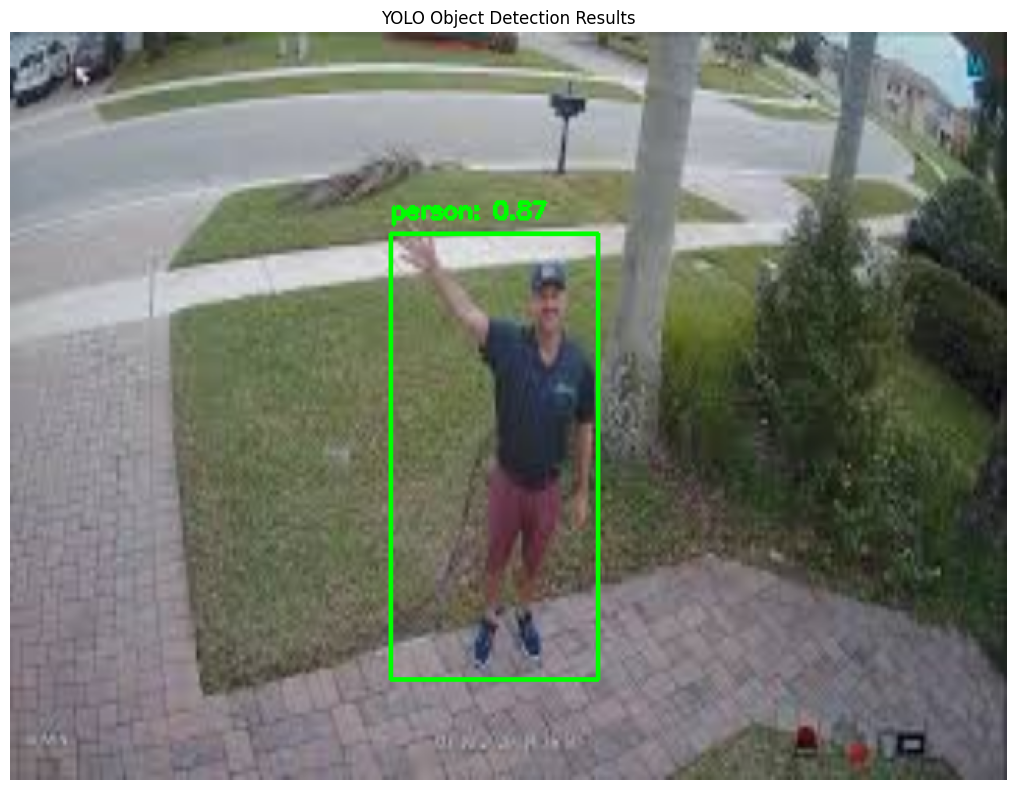

In [10]:
detect_objects_image(r"C:\Users\priya\Downloads\images.jpg", conf_threshold=0.5)

In [11]:
def show_model_info():
    """Display model information and available classes"""
    print("=" * 50)
    print("YOLO Model Information")
    print("=" * 50)
    print(f"Model name: {model.model_name}")
    print(f"Number of classes: {len(model.names)}")
    print("\nDetectable classes:")
    for idx, cls_name in model.names.items():
        print(f"  {idx}: {cls_name}")

show_model_info()

YOLO Model Information
Model name: yolov8n.pt
Number of classes: 80

Detectable classes:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: ce